# ROS - Compression (CBOR)

In this notebook we will learn how to configure ROS components to use the CBOR compression strategy.

In [4]:
%load_ext autoreload
%autoreload 1
%matplotlib inline

import os

import numpy as np
import cv2
import matplotlib.pyplot as plt


# TODO: change this to the name of your Duckiebot
VEHICLE_NAME: str = "kizzy"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# Sensor - Time-of-Flight - Continuous Reading with CBOR compression

from typing import Optional

from duckietown.components.ros import ROSTimeOfFlightDriverComponent
from duckietown.types import IQueue, Range

import cbor2

import roslibpy


# define component
tof: ROSTimeOfFlightDriverComponent = ROSTimeOfFlightDriverComponent(vehicle_name=VEHICLE_NAME, compression="cbor")
tof.start()

# wait for next reading
range: Optional[float] = tof.out_range.get()
print(range)

# stop component
tof.stop()

0.15800000727176666


Using ROS...


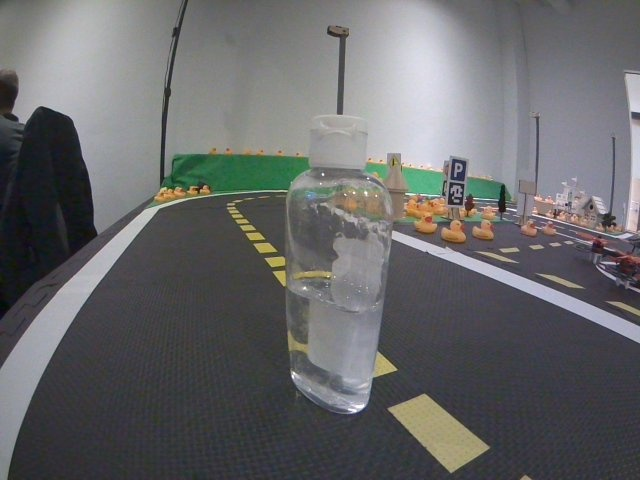

In [7]:
# Sensor - Camera - Live feed with CBOR compression

import cv2
import numpy as np
from IPython.display import display, Image

from duckietown.components.duckiebot import CameraDriverComponent
from duckietown.components.rendering import ImageRendererComponent

# define components
camera: CameraDriverComponent = CameraDriverComponent(vehicle_name=VEHICLE_NAME, compression="cbor")
renderer: ImageRendererComponent = ImageRendererComponent()

# connect components
renderer.in_image.wants(camera.out_bgr)

# start components
camera.start()
renderer.start()

# wait until the cell is stopped
renderer.join()

# stop components
camera.stop()
renderer.stop()

